# Titanic Dataset (competition)

### Target
- Target Accuracy : over 62.5% (atleast) or over 75%

### Data
- There are 2 datasets and 1 for how the submission should be like
- What I need to predict with my DL model is will a person survie according to different inputs
[DataSet](https://www.kaggle.com/c/titanic)

### What I am going to use
- I am going to use tensorflow for this project I could use sklearn but I prefer tensorflow.

### Resource
- [Competion](https://www.kaggle.com/c/titanic)
- [Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial)
- [Wikipedia](https://en.wikipedia.org/wiki/Titanic) *I dont know much about titanic so I want to know thats why I added this.*

Note : I am not a proffessional and there is probably a way better way to do this.

I am going to be using [W&B](https://wandb.ai/) for all the metrics checking and other modelling related analytics

*Sorry for the typo's*

In [113]:
# Other stuff
### 0 = No, 1 = Yes
surviver = "0 = No, 1 = Yes"

In [2]:
https://www.kaggle.com/alexisbcook/titanic-tutorial!unzip /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/Titanic/titanic.zip -d /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/Titanic/

SyntaxError: ignored

In [3]:
!nvidia-smi

Mon Mar 22 14:37:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
directory = "/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/Titanic"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import make_column_transformer
import tensorflow as tf

In [114]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/Titanic/test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/Titanic/train.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/Titanic/gender_submission.csv')

In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data = train_data

In [11]:
data.drop('Cabin',axis=1,inplace=True)

In [12]:
len(train_data.dropna())

712

In [13]:
len(data)

891

In [14]:
data['Age'].fillna(value=data['Age'].mean(),axis=0,inplace=True)

In [15]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
data.dropna(inplace=True)

In [17]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


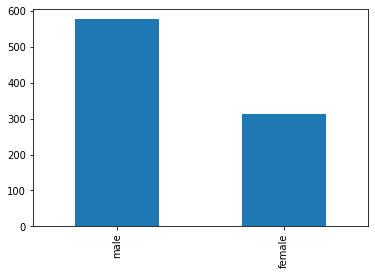

In [20]:
data['Sex'].value_counts().plot.bar()

In [21]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

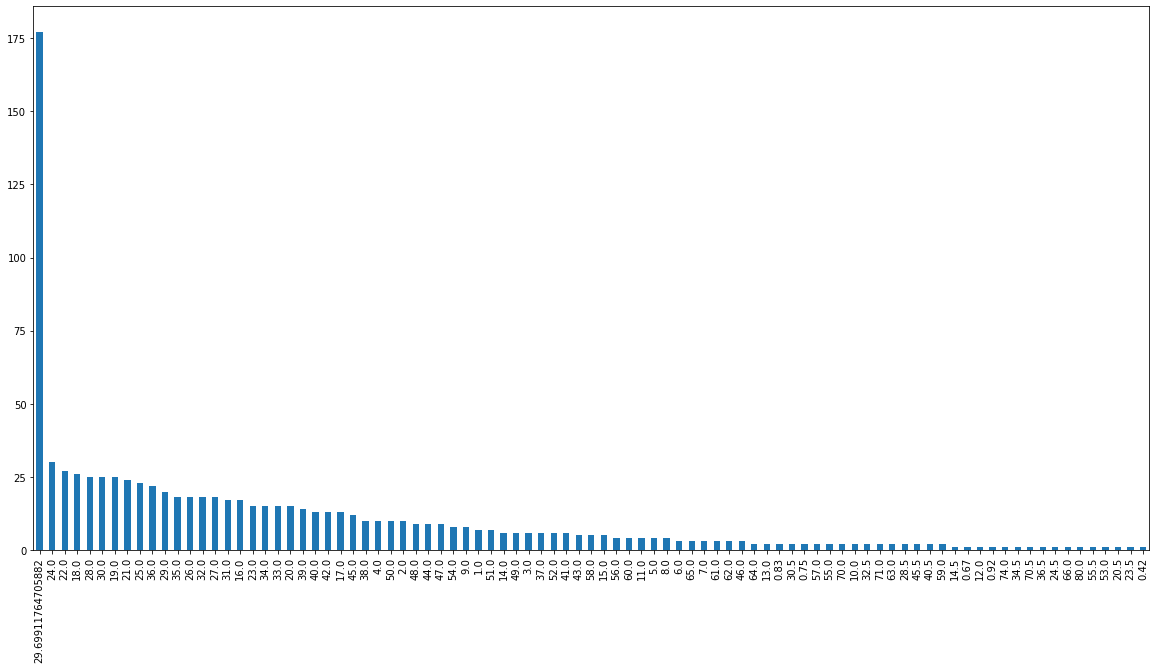

In [23]:
data['Age'].value_counts().plot.bar(figsize=(20,10))

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


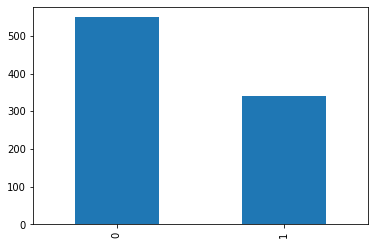

In [25]:
data['Survived'].value_counts().plot.bar()

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [29]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [30]:
ct = make_column_transformer(
    (MinMaxScaler(),['PassengerId','Pclass','Age','SibSp','Parch','Fare']),
    (OneHotEncoder(handle_unknown="ignore"),['Name','Sex','Ticket','Embarked'])
)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [31]:
ct.fit(X)
len(X)

889

In [32]:
X_train_old = X_train
X_test_old = X_test

In [33]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [34]:
X = X.toarray()

AttributeError: ignored

### Modelling

In [35]:
!pip3 install wandb

In [36]:
import wandb
from wandb.keras import WandbCallback

In [37]:
# wandb.init(project='Titanic',name='baseline-model-classification')
# baseline_model = tf.keras.Sequential([
#   tf.keras.layers.Dense(1,activation='relu'),
#   tf.keras.layers.Dense(1,activation='sigmoid')
# ])
# baseline_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# baseline_model.fit(X,y,callbacks=[WandbCallback()],epochs=50)

In [38]:
# wandb.init(project='Titanic',name='baseline-model-regression')
# baseline_model = tf.keras.Sequential([
#   tf.keras.layers.Dense(1),
# ])
# baseline_model.compile(loss=tf.keras.losses.mae,metrics=['mae'],optimizer=tf.keras.optimizers.Adam())
# baseline_model.fit(X,y,callbacks=[WandbCallback()],epochs=50)

#### Going with classification but regression surprisingly also work :)

In [39]:
!pip3 install pip install -U keras tensorflow

In [40]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [45]:
class Experiment:
  def experiment(self,amount_of_layers:int,epochs:int,lr:int,optimizer_,neurons_per_layer:int,activation_types:list,metrics_:list,name:str,project_name:str):
    wandb.init(project=project_name,name=name)
    model = tf.keras.Sequential()
    if int(amount_of_layers) != len(activation_types):
      activation_types_new = []
      for _ in range(amount_of_layers):
        activation_types_new.append(activation_types[0])
    for activation_type in activation_types:
      print(activation_type)
      model.add(tf.keras.layers.Dense(neurons_per_layer,activation=activation_type))
    model.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))
    model.compile(loss=tf.keras.losses.binary_crossentropy,metrics=metrics_,optimizer=optimizer_(lr=lr))
    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,callbacks=[WandbCallback()])
    return model

In [46]:
E = Experiment()

In [47]:
## Results
# Amount of Layers
# Epochs
# lr
# neurons per layer
# activation types

##### Epochs
What I am trying to find is how long should I train the model and how much like patterns can I get that means if the metrics are not going up I am going to decide on those points

In [52]:
# epochs_to_try = [25,50,75,100,125,250,500,750,1000]
# for epoch_to_try in epochs_to_try:
#   E.experiment(amount_of_layers=1,epochs=epoch_to_try,lr=0.001,optimizer_=tf.keras.optimizers.Adam,neurons_per_layer=1,activation_types=['relu'],metrics_=['accuracy'],name=f'epochs-test-{epoch_to_try}',project_name='Titanic')
# print('Done')

##### Amount of layers

In [51]:
# amount_of_layers_to_try = [1,2,5,10,15,25]
# for amount_of_layer_to_try in amount_of_layers_to_try:
#   E.experiment(amount_of_layers=amount_of_layer_to_try,epochs=50,lr=0.001,neurons_per_layer=1,optimizer_=tf.keras.optimizers.Adam,activation_types=['relu'],metrics_=['accuracy'],name=f'amount-of-layers-{amount_of_layer_to_try}',project_name='Titanic')
# print('Done')

#### lr

In [53]:
# lrs = [0.001,0.01,0.1]
# for lr in lrs:
#   E.experiment(amount_of_layers=1,epochs=50,lr=lr,neurons_per_layer=1,activation_types=['relu'],optimizer_=tf.keras.optimizers.Adam,metrics_=['accuracy'],name=f'lrs-{lr}',project_name='Titanic')
# print('Done')

##### neurons per layer

In [ ]:
# neurons_per_layers = [1,5,13,25,50,75,1000]
# for neuron_per_layer in neurons_per_layers:
#   E.experiment(amount_of_layers=1,
#                epochs=50,
#                lr=0.001,
#                neurons_per_layer=neuron_per_layer,
#                activation_types=['relu'],
#                optimizer_=tf.keras.optimizers.Adam,
#                metrics_=['accuracy'],
#                name=f'neuron_per_layer-{neuron_per_layer}',
#                project_name='Titanic')

##### activation_types

In [ ]:
# activation_types = ['relu','tanh','selu','elu']
# for activation_type in activation_types:
#   E.experiment(amount_of_layers=1,epochs=50,lr=0.001,neurons_per_layer=1,activation_types=[activation_type],optimizer_=tf.keras.optimizers.Adam,metrics_=['accuracy'],name=f'activation_types-{activation_type}',project_name='Titanic')

### Results
###### Amount of Layers = 10 1
###### Epochs = 100 125 150 175 200
###### lr = 0.001
###### neurons per layer = 25 1
###### activation types = relu selu

In [67]:
# Layers

In [ ]:
# amount_of_layers_to_try = [10,1]
# for amount_of_layer_to_try in amount_of_layers_to_try:
#   E.experiment(amount_of_layers=amount_of_layer_to_try,epochs=100,lr=0.001,neurons_per_layer=1,optimizer_=tf.keras.optimizers.Adam,activation_types=['relu'],metrics_=['accuracy'],name=f'1-amount-of-layers-{amount_of_layer_to_try}',project_name='Titanic')
# print('Done')

In [69]:
# Epochs

In [70]:
# epochs_to_try = [100,125,150,175,200]
# for epoch_to_try in epochs_to_try:
#   E.experiment(amount_of_layers=1,epochs=epoch_to_try,lr=0.001,optimizer_=tf.keras.optimizers.Adam,neurons_per_layer=1,activation_types=['relu'],metrics_=['accuracy'],name=f'1-epochs-test-{epoch_to_try}',project_name='Titanic')
# print('Done')

21/21 [==============================] - 1s 15ms/step - loss: 0.6704 - accuracy: 0.6274 - val_loss: 0.6453 - val_accuracy: 0.6592
Epoch 2/150
21/21 [==============================] - 0s 6ms/step - loss: 0.6534 - accuracy: 0.5901 - val_loss: 0.6300 - val_accuracy: 0.6592
Epoch 3/150
21/21 [==============================] - 0s 8ms/step - loss: 0.6358 - accuracy: 0.5970 - val_loss: 0.6158 - val_accuracy: 0.6592
Epoch 4/150
21/21 [==============================] - 0s 6ms/step - loss: 0.6065 - accuracy: 0.6199 - val_loss: 0.6035 - val_accuracy: 0.6592
Epoch 5/150
21/21 [==============================] - 0s 6ms/step - loss: 0.6025 - accuracy: 0.5945 - val_loss: 0.5940 - val_accuracy: 0.6592
Epoch 6/150
21/21 [==============================] - 0s 7ms/step - loss: 0.5899 - accuracy: 0.6066 - val_loss: 0.5858 - val_accuracy: 0.6592
Epoch 7/150
21/21 [==============================] - 0s 7ms/step - loss: 0.5748 - accuracy: 0.5974 - val_loss: 0.5787 - val_accuracy: 0.6592
Epoch 8/150
21/21 [=====

epoch,149
loss,0.05063
accuracy,1.0
val_loss,0.46196
val_accuracy,0.80717
_runtime,29
_timestamp,1616426342
_step,149
best_val_loss,0.4613
best_epoch,133


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,██▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▁▁▄▅▆▆▆▆▆▆▇▇▇▇█████████████████████████
val_loss,█▇▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▄▄▅▆▇▇██████████████████▇▇▇▇▇▇▇▇▇▇▇▇▇
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


relu
Epoch 1/175
21/21 [==============================] - 1s 16ms/step - loss: 0.6925 - accuracy: 0.6180 - val_loss: 0.6901 - val_accuracy: 0.6682
Epoch 2/175
21/21 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.6083 - val_loss: 0.6861 - val_accuracy: 0.7085
Epoch 3/175
21/21 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.7096 - val_loss: 0.6801 - val_accuracy: 0.7623
Epoch 4/175
21/21 [==============================] - 0s 7ms/step - loss: 0.6756 - accuracy: 0.7808 - val_loss: 0.6747 - val_accuracy: 0.7578
Epoch 5/175
21/21 [==============================] - 0s 7ms/step - loss: 0.6637 - accuracy: 0.8446 - val_loss: 0.6689 - val_accuracy: 0.7489
Epoch 6/175
21/21 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.8271 - val_loss: 0.6634 - val_accuracy: 0.7489
Epoch 7/175
21/21 [==============================] - 0s 7ms/step - loss: 0.6436 - accuracy: 0.8340 - val_loss: 0.6589 - val_accuracy: 0.7489
Epoch 8

epoch,174
loss,0.04736
accuracy,1.0
val_loss,0.5408
val_accuracy,0.76233
_runtime,31
_timestamp,1616426377
_step,174
best_val_loss,0.53153
best_epoch,96


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,██▇▇▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▆▆▆▇▇▇█████████████████████████████
val_loss,█▇▆▅▅▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▅███▆▆▇▅▆▇▇██▇██████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


relu
Epoch 1/200
21/21 [==============================] - 1s 16ms/step - loss: 0.6918 - accuracy: 0.6159 - val_loss: 0.6879 - val_accuracy: 0.6592
Epoch 2/200
21/21 [==============================] - 0s 7ms/step - loss: 0.6880 - accuracy: 0.6081 - val_loss: 0.6824 - val_accuracy: 0.6592
Epoch 3/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6806 - accuracy: 0.6491 - val_loss: 0.6762 - val_accuracy: 0.6592
Epoch 4/200
21/21 [==============================] - 0s 7ms/step - loss: 0.6768 - accuracy: 0.6103 - val_loss: 0.6696 - val_accuracy: 0.6592
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 0.6725 - accuracy: 0.5898 - val_loss: 0.6629 - val_accuracy: 0.6592
Epoch 6/200
21/21 [==============================] - 0s 7ms/step - loss: 0.6645 - accuracy: 0.6001 - val_loss: 0.6551 - val_accuracy: 0.6592
Epoch 7/200
21/21 [==============================] - 0s 7ms/step - loss: 0.6573 - accuracy: 0.5922 - val_loss: 0.6470 - val_accuracy: 0.6592
Epoch 8

In [71]:
# neurons per layer

In [72]:
neurons_per_layers = [25,1]
for neuron_per_layer in neurons_per_layers:
  E.experiment(amount_of_layers=1,
               epochs=100,
               lr=0.001,
               neurons_per_layer=neuron_per_layer,
               activation_types=['relu'],
               optimizer_=tf.keras.optimizers.Adam,
               metrics_=['accuracy'],
               name=f'1-neuron_per_layer-{neuron_per_layer}',
               project_name='Titanic')
print('Done')

epoch,199
loss,0.03458
accuracy,1.0
val_loss,0.46636
val_accuracy,0.78924
_runtime,37
_timestamp,1616426418
_step,199
best_val_loss,0.46382
best_epoch,145


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,██▇▇▆▆▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▁▁▁▁▄▅▆▆▆▆▆▇▇▇▇████████████████████████
val_loss,█▇▆▅▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▄▅▆▇▇██▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


relu
Epoch 1/100
21/21 [==============================] - 1s 15ms/step - loss: 0.6633 - accuracy: 0.6358 - val_loss: 0.6324 - val_accuracy: 0.6951
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6191 - accuracy: 0.6708 - val_loss: 0.5975 - val_accuracy: 0.7354
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5698 - accuracy: 0.7550 - val_loss: 0.5628 - val_accuracy: 0.7668
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5225 - accuracy: 0.8354 - val_loss: 0.5352 - val_accuracy: 0.7982
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 0.4644 - accuracy: 0.8664 - val_loss: 0.5109 - val_accuracy: 0.7848
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4195 - accuracy: 0.8637 - val_loss: 0.4951 - val_accuracy: 0.8027
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3743 - accuracy: 0.8698 - val_loss: 0.4876 - val_accuracy: 0.7937
Epoch 8

epoch,99
loss,0.0014
accuracy,1.0
val_loss,0.55425
val_accuracy,0.76682
_runtime,18
_timestamp,1616426440
_step,99
best_val_loss,0.4666
best_epoch,16


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▇▅▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▆▆▇▇██████████████████████████████████
val_loss,█▅▂▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▄▄▅▅
val_accuracy,▁▆█▇▇▇▆▆▆▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
_runtime,▁▁▁▁▁▂▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇██
_timestamp,▁▁▁▁▁▂▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇██
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


relu
Epoch 1/100
21/21 [==============================] - 1s 16ms/step - loss: 0.6911 - accuracy: 0.6107 - val_loss: 0.6858 - val_accuracy: 0.6592
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6854 - accuracy: 0.6153 - val_loss: 0.6790 - val_accuracy: 0.6592
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 0.6797 - accuracy: 0.6028 - val_loss: 0.6711 - val_accuracy: 0.6592
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 0.6718 - accuracy: 0.6078 - val_loss: 0.6633 - val_accuracy: 0.6592
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6638 - accuracy: 0.6008 - val_loss: 0.6550 - val_accuracy: 0.6592
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6526 - accuracy: 0.6189 - val_loss: 0.6468 - val_accuracy: 0.6592
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6463 - accuracy: 0.6006 - val_loss: 0.6387 - val_accuracy: 0.6592
Epoch 8

In [73]:
# activation

In [75]:
activation_types = ['relu','selu']
for activation_type in activation_types:
  E.experiment(amount_of_layers=1,epochs=50,lr=0.001,neurons_per_layer=1,activation_types=[activation_type],optimizer_=tf.keras.optimizers.Adam,metrics_=['accuracy'],name=f'2-activation_types-{activation_type}',project_name='Titanic')
print('Done')

epoch,49
loss,0.24423
accuracy,0.95796
val_loss,0.48229
val_accuracy,0.77578
_runtime,12
_timestamp,1616426527
_step,49
best_val_loss,0.48229
best_epoch,49


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,██▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
accuracy,▁▄▅▅▅▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████
val_loss,█▇▇▇▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▅▆▅▅▆▆▇██▇█████▇███▇▇██▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
_runtime,▁▁▂▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇█
_timestamp,▁▁▂▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇█
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


relu
Epoch 1/50
21/21 [==============================] - 1s 16ms/step - loss: 0.6928 - accuracy: 0.5777 - val_loss: 0.6906 - val_accuracy: 0.6592
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6913 - accuracy: 0.5978 - val_loss: 0.6885 - val_accuracy: 0.6592
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6890 - accuracy: 0.6276 - val_loss: 0.6860 - val_accuracy: 0.6592
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6889 - accuracy: 0.5882 - val_loss: 0.6837 - val_accuracy: 0.6592
Epoch 5/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6871 - accuracy: 0.5985 - val_loss: 0.6814 - val_accuracy: 0.6592
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6846 - accuracy: 0.6140 - val_loss: 0.6794 - val_accuracy: 0.6592
Epoch 7/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6834 - accuracy: 0.6117 - val_loss: 0.6773 - val_accuracy: 0.6592
Epoch 8/50
21/

epoch,49
loss,0.35703
accuracy,0.94745
val_loss,0.55451
val_accuracy,0.7713
_runtime,12
_timestamp,1616426546
_step,49
best_val_loss,0.55451
best_epoch,49


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,████████▇▇▇▇▇▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
accuracy,▁▁▁▁▁▁▁▁▂▄▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇████
val_loss,████▇▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▃▅███▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▇▇
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇██
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇██
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


selu
Epoch 1/50
21/21 [==============================] - 1s 17ms/step - loss: 0.6855 - accuracy: 0.6657 - val_loss: 0.6785 - val_accuracy: 0.7085
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6765 - accuracy: 0.6657 - val_loss: 0.6693 - val_accuracy: 0.6996
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6666 - accuracy: 0.6648 - val_loss: 0.6601 - val_accuracy: 0.6951
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6591 - accuracy: 0.6541 - val_loss: 0.6508 - val_accuracy: 0.7085
Epoch 5/50
21/21 [==============================] - 0s 8ms/step - loss: 0.6444 - accuracy: 0.6752 - val_loss: 0.6409 - val_accuracy: 0.7085
Epoch 6/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6428 - accuracy: 0.6430 - val_loss: 0.6328 - val_accuracy: 0.7220
Epoch 7/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6253 - accuracy: 0.6813 - val_loss: 0.6238 - val_accuracy: 0.7220
Epoch 8/50
21/

### Results
###### Amount of Layers = 1
###### Epochs = 150
###### lr = 0.001
###### neurons per layer = 1
###### activation types = selu

### Big Dog Model !!

In [77]:
directory

'/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/Titanic'

In [80]:
E = Experiment()
model_1 = E.experiment(amount_of_layers=1,epochs=150,lr=0.001,neurons_per_layer=1,activation_types=['selu'],project_name='Titanic',name='Big-Dog-Model-1',optimizer_=tf.keras.optimizers.Adam,metrics_=['accuracy'])
model_1.save(directory + '/model_1.h5')

epoch,49
loss,0.23939
accuracy,0.93243
val_loss,0.47223
val_accuracy,0.79372
_runtime,12
_timestamp,1616426562
_step,49
best_val_loss,0.47223
best_epoch,49


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,████▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
accuracy,▁▁▁▂▂▂▂▂▃▄▅▅▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████
val_loss,██▇▇▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▂▁▁▂▃▃▃▃▄▄▅▅▆▆▇▇██████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
_runtime,▁▁▂▂▂▂▃▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇███
_timestamp,▁▁▂▂▂▂▃▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


selu
Epoch 1/150
21/21 [==============================] - 1s 16ms/step - loss: 0.6830 - accuracy: 0.5448 - val_loss: 0.6728 - val_accuracy: 0.6502
Epoch 2/150
21/21 [==============================] - 0s 7ms/step - loss: 0.6442 - accuracy: 0.7141 - val_loss: 0.6378 - val_accuracy: 0.7040
Epoch 3/150
21/21 [==============================] - 0s 6ms/step - loss: 0.6176 - accuracy: 0.7020 - val_loss: 0.6154 - val_accuracy: 0.7220
Epoch 4/150
21/21 [==============================] - 0s 6ms/step - loss: 0.5937 - accuracy: 0.7106 - val_loss: 0.6001 - val_accuracy: 0.7175
Epoch 5/150
21/21 [==============================] - 0s 7ms/step - loss: 0.5553 - accuracy: 0.7717 - val_loss: 0.5868 - val_accuracy: 0.7265
Epoch 6/150
21/21 [==============================] - 0s 7ms/step - loss: 0.5465 - accuracy: 0.7768 - val_loss: 0.5779 - val_accuracy: 0.7578
Epoch 7/150
21/21 [==============================] - 0s 6ms/step - loss: 0.5323 - accuracy: 0.8076 - val_loss: 0.5707 - val_accuracy: 0.7758
Epoch 8

In [82]:
E = Experiment()
model_2 = E.experiment(amount_of_layers=1,epochs=50,lr=0.001,neurons_per_layer=1,activation_types=['selu'],project_name='Titanic',name='Big-Dog-Model-2',optimizer_=tf.keras.optimizers.Adam,metrics_=['accuracy'])
model_2.save(directory + '/model_2.h5')

epoch,0
loss,0.68693
accuracy,0.52402
val_loss,0.67096
val_accuracy,0.67713
_runtime,4
_timestamp,1616426819
_step,0
best_val_loss,0.67096
best_epoch,0


epoch,▁
loss,▁
accuracy,▁
val_loss,▁
val_accuracy,▁
_runtime,▁
_timestamp,▁
_step,▁


selu
Epoch 1/50
21/21 [==============================] - 1s 18ms/step - loss: 0.6928 - accuracy: 0.5479 - val_loss: 0.6884 - val_accuracy: 0.6592
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.5722 - val_loss: 0.6836 - val_accuracy: 0.6592
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6845 - accuracy: 0.6056 - val_loss: 0.6767 - val_accuracy: 0.6592
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.5992 - val_loss: 0.6699 - val_accuracy: 0.6592
Epoch 5/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6765 - accuracy: 0.5616 - val_loss: 0.6630 - val_accuracy: 0.6592
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6623 - accuracy: 0.6189 - val_loss: 0.6555 - val_accuracy: 0.6592
Epoch 7/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6585 - accuracy: 0.5942 - val_loss: 0.6484 - val_accuracy: 0.6592
Epoch 8/50
21/

In [83]:
E = Experiment()
model_3 = E.experiment(amount_of_layers=1,epochs=75,lr=0.001,neurons_per_layer=1,activation_types=['selu'],project_name='Titanic',name='Big-Dog-Model-3',optimizer_=tf.keras.optimizers.Adam,metrics_=['accuracy'])
model_3.save(directory + '/model_3.h5')

epoch,49
loss,0.26029
accuracy,0.94144
val_loss,0.48595
val_accuracy,0.78027
_runtime,12
_timestamp,1616426841
_step,49
best_val_loss,0.48595
best_epoch,49


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁
accuracy,▁▂▂▂▂▂▂▂▂▂▃▃▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████
val_loss,███▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▂▃▄▄▅▆▆▆██████████████████▇▇▇▇▇▇
_runtime,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█
_timestamp,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


selu
Epoch 1/75
21/21 [==============================] - 1s 16ms/step - loss: 0.6914 - accuracy: 0.5880 - val_loss: 0.6869 - val_accuracy: 0.6592
Epoch 2/75
21/21 [==============================] - 0s 7ms/step - loss: 0.6869 - accuracy: 0.6083 - val_loss: 0.6810 - val_accuracy: 0.6592
Epoch 3/75
21/21 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.6091 - val_loss: 0.6744 - val_accuracy: 0.6592
Epoch 4/75
21/21 [==============================] - 0s 7ms/step - loss: 0.6737 - accuracy: 0.6190 - val_loss: 0.6678 - val_accuracy: 0.6592
Epoch 5/75
21/21 [==============================] - 0s 7ms/step - loss: 0.6655 - accuracy: 0.6279 - val_loss: 0.6612 - val_accuracy: 0.6592
Epoch 6/75
21/21 [==============================] - 0s 6ms/step - loss: 0.6616 - accuracy: 0.5981 - val_loss: 0.6543 - val_accuracy: 0.6592
Epoch 7/75
21/21 [==============================] - 0s 7ms/step - loss: 0.6564 - accuracy: 0.5957 - val_loss: 0.6479 - val_accuracy: 0.6592
Epoch 8/75
21/

In [84]:
E = Experiment()
model_4 = E.experiment(amount_of_layers=1,epochs=100,lr=0.001,neurons_per_layer=1,activation_types=['selu'],project_name='Titanic',name='Big-Dog-Model-4',optimizer_=tf.keras.optimizers.Adam,metrics_=['accuracy'])
model_4.save(directory + '/model_4.h5')

epoch,74
loss,0.14574
accuracy,0.99249
val_loss,0.48302
val_accuracy,0.76233
_runtime,16
_timestamp,1616426919
_step,74
best_val_loss,0.48111
best_epoch,60


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,████▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁
accuracy,▁▁▁▁▁▁▂▃▄▅▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇████████
val_loss,██▇▇▆▆▆▅▅▄▄▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▂▄▅▆▇▇██▇▇███████▇▇▇▇▇▆▇▆▆▆▇▆▆▆▆▆▆
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇██
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇██
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


selu
Epoch 1/100
21/21 [==============================] - 1s 17ms/step - loss: 0.6747 - accuracy: 0.6037 - val_loss: 0.6441 - val_accuracy: 0.7085
Epoch 2/100
21/21 [==============================] - 0s 8ms/step - loss: 0.6509 - accuracy: 0.6263 - val_loss: 0.6264 - val_accuracy: 0.7220
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 0.6315 - accuracy: 0.6493 - val_loss: 0.6108 - val_accuracy: 0.7309
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.6824 - val_loss: 0.5978 - val_accuracy: 0.7265
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5767 - accuracy: 0.7772 - val_loss: 0.5853 - val_accuracy: 0.7309
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5650 - accuracy: 0.7700 - val_loss: 0.5754 - val_accuracy: 0.7578
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5478 - accuracy: 0.8092 - val_loss: 0.5657 - val_accuracy: 0.7848
Epoch 8

In [85]:
E = Experiment()
model_5 = E.experiment(amount_of_layers=1,epochs=round(85),lr=0.001,neurons_per_layer=1,activation_types=['selu'],project_name='Titanic',name='Big-Dog-Model-5',optimizer_=tf.keras.optimizers.Adam,metrics_=['accuracy'])
model_5.save(directory + '/model_5.h5')

epoch,99
loss,0.0458
accuracy,1.0
val_loss,0.46366
val_accuracy,0.7713
_runtime,20
_timestamp,1616426943
_step,99
best_val_loss,0.46025
best_epoch,80


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▇▇▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▂▄▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇███████████████████
val_loss,█▇▅▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▅▇█████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅
_runtime,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


selu
Epoch 1/85
21/21 [==============================] - 1s 16ms/step - loss: 0.7073 - accuracy: 0.4176 - val_loss: 0.6834 - val_accuracy: 0.5964
Epoch 2/85
21/21 [==============================] - 0s 7ms/step - loss: 0.6764 - accuracy: 0.6092 - val_loss: 0.6557 - val_accuracy: 0.6637
Epoch 3/85
21/21 [==============================] - 0s 6ms/step - loss: 0.6447 - accuracy: 0.6534 - val_loss: 0.6355 - val_accuracy: 0.6682
Epoch 4/85
21/21 [==============================] - 0s 7ms/step - loss: 0.6263 - accuracy: 0.6216 - val_loss: 0.6216 - val_accuracy: 0.6637
Epoch 5/85
21/21 [==============================] - 0s 7ms/step - loss: 0.5960 - accuracy: 0.6840 - val_loss: 0.6087 - val_accuracy: 0.6637
Epoch 6/85
21/21 [==============================] - 0s 6ms/step - loss: 0.5929 - accuracy: 0.6764 - val_loss: 0.5994 - val_accuracy: 0.6906
Epoch 7/85
21/21 [==============================] - 0s 7ms/step - loss: 0.5665 - accuracy: 0.7267 - val_loss: 0.5892 - val_accuracy: 0.6951
Epoch 8/85
21/

## `model_4` wins !!!

In [86]:
# lets predict the test data

In [87]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [115]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [116]:
test_data.drop('Cabin',axis=1,inplace=True)

In [117]:
test_data.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [118]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [119]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [120]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [121]:
ids = test_data['PassengerId']

In [122]:
old_test_data = test_data
test_data = ct.transform(test_data)
test_data = test_data.toarray()

In [123]:
len(model_4.predict(test_data))

418

In [124]:
preds = tf.squeeze(tf.round(model_4.predict(test_data)))

In [126]:
ids

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [128]:
preds

<tf.Tensor: shape=(418,), dtype=float32, numpy=
array([0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0

In [130]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [163]:
submission_preds_data = pd.DataFrame({'PassengerId':[],'Survived':[]})

In [164]:
for _id,pred in zip(ids,preds):
  pred = int(pred.numpy())
  _id = int(_id)
  submission_preds_data = submission_preds_data.append({'PassengerId':_id,'Survived':pred},ignore_index=True)

In [165]:
submission_preds_data.dtypes

PassengerId    float64
Survived       float64
dtype: object

In [166]:
submission_preds_data

,PassengerId,Survived
0,892.0,0.0
1,893.0,1.0
2,894.0,0.0
3,895.0,0.0
4,896.0,1.0
...,...,...
413,1305.0,0.0
414,1306.0,1.0
415,1307.0,0.0
416,1308.0,0.0


In [167]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [168]:
directory

'/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/Titanic'

In [170]:
submission_preds_data.to_csv(directory + '/submission.csv',index=False)

In [171]:
pd.read_csv(directory + '/submission.csv')

,PassengerId,Survived
0,892.0,0.0
1,893.0,1.0
2,894.0,0.0
3,895.0,0.0
4,896.0,1.0
...,...,...
413,1305.0,0.0
414,1306.0,1.0
415,1307.0,0.0
416,1308.0,0.0


# Done